<a href="https://colab.research.google.com/github/Karenjbc7/Estad-stica-I/blob/main/Estad%C3%ADstica1_Parte_pr%C3%A1ctica_examen3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte práctica tercer parcial de estadística

Karen Julieth Bermúdez Calderón - 2220950

Ana Sofía Bossa Jaimes - 2220645

Juan Diego Rojas Ávila - 2221233

INTRODUCCION

El DANE es la entidad del Estado colombiano encargada de las estadísticas oficiales. Esta entidad realiza una recolección de datos en el 2020 mediante formularios de nacidos vivos y de defunción diligenciados por personal médico, enfermera o personal de salud autorizado que atendió el hecho vital en las instituciones prestadoras de servicios de salud.
De estos formularios se toman dos variables, T_GES y TALLA_NAC, a partir de ellas en este trabajo se analizan los resultados, que influyen en cada uno de estos valores teniendo en cuenta los gráficos generados, la correlación que existe entre ellas.


# *Estadística descriptiva para variables cualitativas*

Los datos que conforman la base de datos Estadísticas Vitales - EEVV - 2020 fueron obtenidos, según el Departamento Administrativo Nacional de Estadística de la siguiente forma:

  Los procesos operativos que se surten en la producción de las Estadísticas Vitales; los certificados en blanco salen del DANE Central hacia las Territoriales, posteriormente las territoriales las distribuyen entre las subsedes del DANE, estas los envían a las direcciones departamentales y/o distritales de salud; seguidamente, se distribuyen en las direcciones municipales y/o locales de salud; finalmente llegan hasta la unidades notificadoras de registros vitales como unidades locales de Medicina Legal, médicos particulares, Instituciones Prestadoras de Servicios de Salud y oficinas del registro civil (registradurías y notarías).
  Una vez se genera el hecho vital, el certificado diligenciado es ingresado al aplicativo dispuesto por el MSPS, RUAF-ND. La información consolidada se envía al DANE de manera periódica en formato de base de datos. Este registro administrativo es una de las fuentes de información utilizada por el DANE. (DANE, 2022)

  Los certificados anteriormente mencionados son el CERTIFICADO DE NACIDO VIVO y el CERTIFICADO DE DEFUNCIÓN.

  El certificado de nacido vivo consta de un certificado antecedente que incluye las variables requeridas para el registro civil y que debe ser entregado a los padres del nacido vivo, para que cumpla con dicho trámite y un certificado completo, que es el que recibe la Dirección Territorial de Salud y es enviado al DANE, donde se desarrollan los respectivos procesos de crítica, codificación, grabación, control de calidad y procesamiento. (DANE, 2022)

Este se divide en tres capítulos: en el primero se registran los datos del recién nacido, en el segundo algunos datos de los padres y en el tercero los datos del diligenciador del certificado.

En cuanto al certificado de defunción:

Este instrumento recoge la información de la defunción, facilitando así el seguimiento de los programas institucionales y gubernamentales desarrollados para evaluar su impacto.
Debe diligenciarse a todo fallecido que haya sido considerado nacido vivo, aunque la muerte suceda por causa natural o violenta y para las defunciones que ocurran antes o durante el parto, nominadas "muertes fetales". (DANE,2022)

El tipo de muestreo que se usó en la recolección de datos es un muestreo deliberado, crítico o por juicio, que según (Muguira, s.f) "es aquel que se selecciona con base en el conocimiento de una población o propósito del estudio."


In [ ]:
from google.colab import files # Para cargar archivos en google colab
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [ ]:
uploaded = files.upload()
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

Saving nac2020.csv to nac2020.csv


,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [ ]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
44,6,9
44,6,9
44,6,9
44,6,9


In [ ]:
df2 = tabla1[(tabla1.T_GES != 9) & (tabla1["TALLA_NAC"] != 9)]
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4


In [ ]:
df2.T_GES.head(2)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)

<ipython-input-10-e608aef629bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


COD_DPTO
52    4
20    4
Name: T_GES, dtype: object

In [ ]:
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.loc[(df2.TALLA_NAC == '1'), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == '2'), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == '3'), "TALLA_NAC"] = 'Menos de 20', '20-29', '30-39'
df2.loc[(df2.TALLA_NAC == '4'), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == '5'), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == '6'), "TALLA_NAC"] = '40-49', '50-59', '60 y Más'


<ipython-input-11-f7743d049dd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"] = "Menos de 22"
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22 - 27"
df2.loc[(df2.T_GES == "3"), "T_GES"] = "28 - 37"
df2.loc[(df2.T_GES == "4"), "T_GES"] = "38 - 41"
df2.loc[(df2.T_GES == "5"), "T_GES"] = "42 o más"
df2.loc[(df2.T_GES == "6"), "T_GES"] = "Ignorado"
df2.loc[(df2.T_GES == "9"), "T_GES"] = "N/A"

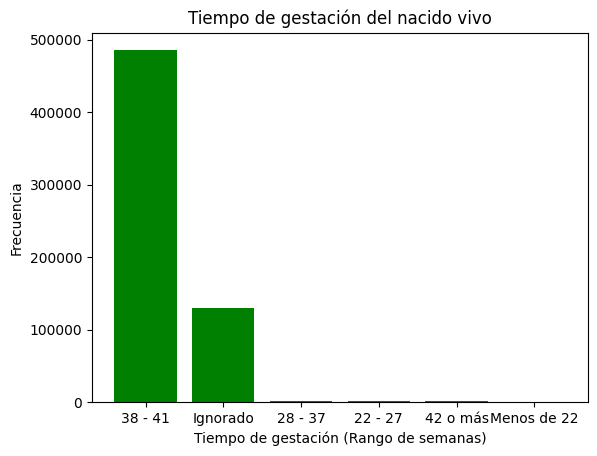

In [ ]:
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title('Tiempo de gestación del nacido vivo')
ax = plt.subplot()  # Axis
ax.set_xlabel('Tiempo de gestación (Rango de semanas)')
ax.set_ylabel('Frecuencia')
plt.show()

La mayoría de los nacidos vivos en Colombia se encuentran en el rango entre las 38 y las 41 semanas de gestación, con una frecuencia cercana a 500,000. Esto indica que la mayoría de los nacimientos ocurren a aproximadamente término completo, el cual se considera a partir de las 39 semanas.

La categoría "ignorado" es la segunda categoría con más frecuencia, la cual es aproximadamente 130000, aunque es significativamente menor que la categoría de 38 - 41 semanas. Esto sugiere que hay una cantidad considerable de datos donde el tiempo de gestación no fue registrado o no está disponible.

Los rangos de 28 - 37 semanas, 22 - 27 semanas, 42 o más semanas, y menos de 22 semanas tienen frecuencias muy bajas en comparación con las dos primeras categorías, ya que esta es cercana a 0. Esto indica que los nacimientos prematuros y post-término son mucho menos comunes, destacando los nacimientos dados antes de las 22 semanas, los cuales tienen la frecuencia más baja de ocurrencia.

En otras palabras, la mayoría de los nacidos vivos ocurren a término completo (38 - 41 semanas), y hay una cantidad significativa de casos donde el tiempo de gestación es desconocido o no se registró. Los nacimientos prematuros (antes de las 37 semanas) y post-término (después de las 42 semanas de gestación) son relativamente raros, es decir, se consideran atípicos.



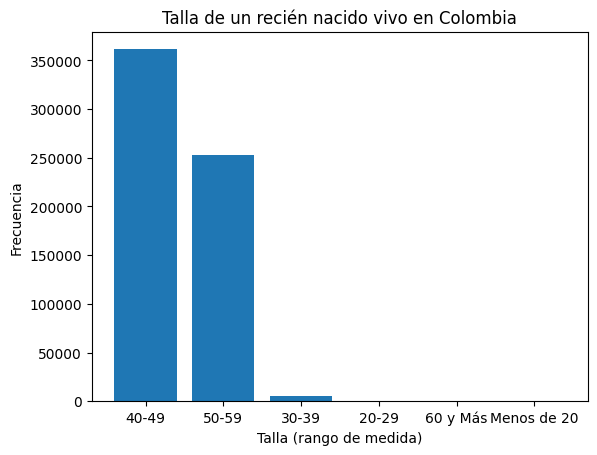

In [ ]:
x_values2 = df2.TALLA_NAC.unique()
y_values2 = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values2, y_values2)
plt.title('Talla de un recién nacido vivo en Colombia')
plt.xlabel('Talla (rango de medida)')
plt.ylabel('Frecuencia')
plt.show()

El rango de medida entre "40-49" con una frecuencia de 360000 corresponde a la talla que más se repite en Colombia referente a la Talla de un recién nacido.
El rango de medida entre "50-59" aunque es la talla más grande, tiene una frecuencia de 250000, esta talla depende de factores como el potencial genético, la estatura de los padres.
El rango de "30-39" es la talla menos frecuente, esto se debe a que es muy inusual que la talla de un recién nacido sea de este rango, esta talla se debe a las diferentes situaciones como hábitos de la madre, además puede dar a luz en un tiempo previo al establecido.

In [ ]:
sizes = np.array(y_values)
sizes

array([485433, 130485,   2236,   1482,   1163,     28])

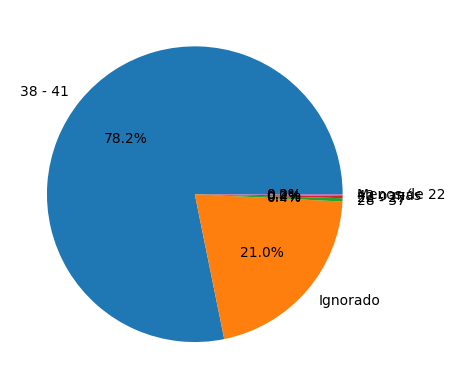

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

En este gráfico circular, puede apreciarse de mejor forma las proporciones del total de datos de la variable del tiempo de gestación de un nacido vivo en Colombia correspondientes a los rangos de tiempos de semanas. Como se mencionó anteriormente, la mayor proporción corresponde al rango entre 38-41 semanas, seguido del grupo de datos "ignorado" y finalmente las menores proporciones corresponden a los rangos de 28 - 37 semanas, 22 - 27 semanas, 42 o más semanas, y menos de 22 semanas

In [ ]:
len(df2.T_GES)

620827

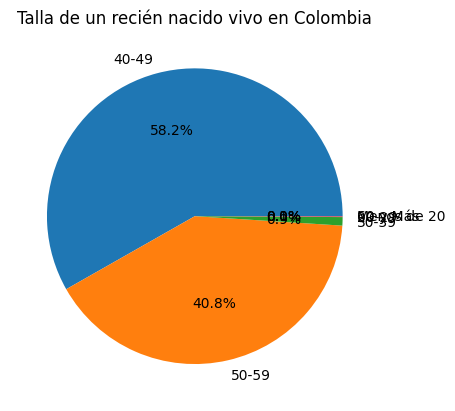

In [ ]:
plt.pie(y_values2, labels = x_values2, autopct= '%1.1f%%')
plt.title('Talla de un recién nacido vivo en Colombia')
plt.show()

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['38 - 41' 'Ignorado' '28 - 37' '22 - 27' '42 o más' 'Menos de 22']
[78.19134799227481, 21.017932531929183, 0.3601647479893754, 0.23871384459760933, 0.18733077008570825, 0.004510113123301661]


Aproximadamente el 78% de los nacidos vivos se encuentran en el rango de gestación de 38 - 41 semanas, indicando que la gran mayoría de los nacimientos ocurren a término completo.

Alrededor del 21% de los datos no tienen el tiempo de gestación registrado o disponible. Esto es significativo y puede indicar problemas en la recolección de datos o situaciones donde la información no se pudo obtener.

Menos del 1% de los nacidos vivos ocurren en el rango de 28 - 37 semanas, indicando que los nacimientos prematuros (pero no extremadamente prematuros) son relativamente raros.

Solo un 0.24% de los nacimientos ocurren en el rango de 22 - 27 semanas, lo que sugiere que los nacimientos extremadamente prematuros son muy poco comunes.

Un pequeño porcentaje (0.19%) de los nacidos vivos ocurre después de 42 semanas de gestación, indicando que los nacimientos post-término también son poco comunes.

Los nacimientos con menos de 22 semanas de gestación son extremadamente raros, representando menos del 0.01% de los nacidos vivos.

En general, la mayoría de los nacimientos ocurren a término completo (38 - 41 semanas), con un porcentaje significativo de datos donde la gestación es desconocida. Los nacimientos prematuros (especialmente los extremadamente prematuros) y los nacimientos post-término son muy raros en comparación con los nacimientos a término. Esto refleja una distribución esperada donde la mayoría de los nacimientos ocurren en el rango saludable de 38 a 41 semanas.

In [ ]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values2]
print(x_values2)
print(porcentaje)

['40-49' '50-59' '30-39' '20-29' '60 y Más' 'Menos de 20']
[58.21976170495162, 40.76369101214992, 0.9207073790282962, 0.07699407403350692, 0.018523678899274677, 0.00032215093737869]


Aproximadamente el 58.28% de los nacidos vivos se encuentran en el rango de talla entre 40-49cm, indicando que la gran mayoría de nacidos vivos tienen esta medida.
Alrededor del 40.7% tienen una talla entre 50-59 cm, como se indicó en el análisis gráfico esto se debe a varios factores genéticos.
El 0.92%  de los nacidos vivos tienen talla entre 30- 39cm, indicando los nacimientos pueden ser prematuros.
El 0.076% corresponde al rango entre 20-29cm, nacimientos extremadamente prematuros son muy poco comunes.
Un 0.018% una talla de más de 60cm y el 0.00032% talla de menos de 20cm, medidas pocos comunes.


# *Tablas de contingencia*

* Representación gráfica de una tabla de contingencia.
* Proporciones asociadas a una tabla de contingencia.

In [ ]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

<ipython-input-12-4ae3ab049010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


COD_DPTO
52    4
20    5
Name: TALLA_NAC, dtype: object

In [ ]:
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "Menos de 20"
df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"] = "20 - 29"
df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "30 - 39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"] = "40 - 49"
df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"] = "50 - 59"
df2.loc[(df2.TALLA_NAC == "6"), "TALLA_NAC"] = "60 o más"
df2.loc[(df2.TALLA_NAC == "9"), "TALLA_NAC"] = "N/A"
df2.head(3)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38 - 41,40 - 49
20,38 - 41,50 - 59
27,38 - 41,50 - 59


In [ ]:
tabla_cont = pd.crosstab(df2.T_GES, df2["TALLA_NAC"])
tabla_cont

TALLA_NAC,20 - 29,30 - 39,40 - 49,50 - 59,60 o más,Menos de 20
T_GES,,,,,,
22 - 27,260,1872,102,0,0,2
28 - 37,53,3619,89212,37593,8,0
38 - 41,76,198,162543,322515,101,0
42 o más,0,0,256,902,5,0
Ignorado,67,21,959,434,1,0
Menos de 22,22,6,0,0,0,0


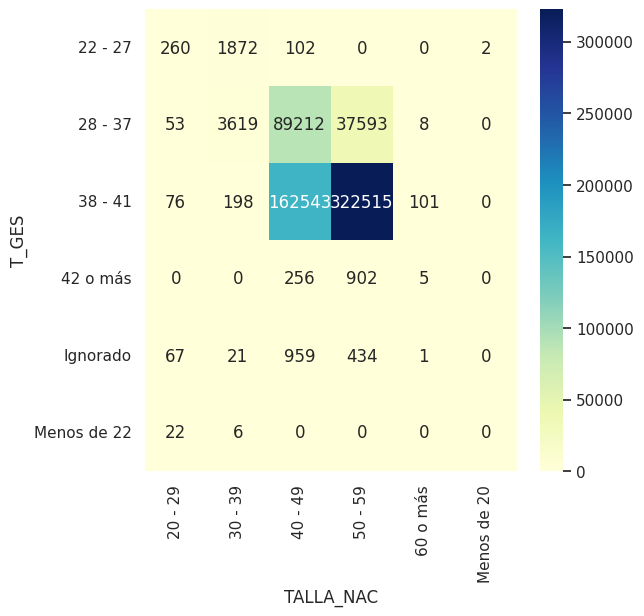

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

De esta tabla se puede observar lo siguiente:

Hay una alta concentración de datos en las categorías de T_GES "28 - 37" y "38 - 41", y en las categorías de TALLA_NAC "40 - 49" y "50 - 59". La alta concentración de datos en estos rangos podría reflejar que los cuidados prenatales y las condiciones de salud general en la población estudiada son adecuados para llevar a término la mayoría de los embarazos en estos periodos.
Esto subraya la importancia de mejorar el cuidado prenatal para prevenir partos prematuros. Iniciativas como programas de monitoreo para identificar factores de riesgo y proporcionar intervenciones oportunas podrían ser beneficiosas.

Las categorías de T_GES "Menos de 22" y "Ignorado" tienen menos observaciones en general. Los nacimientos en el rango de menos de 22 semanas son extremadamente prematuros y están asociados con altas tasas de mortalidad y complicaciones, además sugiere la necesidad de intervenciones preventivas y de cuidados intensivos neonatales e implementar programas enfocados en identificar y manejar embarazos de alto riesgo son esenciales. La categoría "Ignorado" nos indica una falta de datos sobre el tiempo de gestación en algunos casos, lo cual puede afectar la precisión de los análisis, es decir,casos donde el tiempo de gestación no fue registrado. Esto puede ser un indicio de deficiencias en el sistema de recolección de datos o de atención prenatal, lo que sugiere la necesidad de mejorar la precisión y exhaustividad del registro de datos.
Mejorar los sistemas de recolección de datos y asegurar que toda la información prenatal relevante sea registrada correctamente es crucial.

Las categorías de TALLA_NAC "Menos de 20" y "60 o más" también tienen menos observaciones.

In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")

El valor de la estadística Chi cuadrado es 299847.0666226869 y el valor p es d 0.0


* Si valor p < 0.05 se rechaza la hipótesis nula.
* Si valor p > 0.05 no se rechaza la hipótesis nula.

El valor alto de la estadística Chi cuadrado indica una gran diferencia entre las frecuencias observadas y las frecuencias esperadas bajo la hipótesis de independencia. Un valor p de 0.0 (muy cercano a 0) sugiere que la probabilidad de observar una estadística Chi cuadrado tan extrema, o más, bajo la hipótesis nula es prácticamente nula.

Como el valor p = 0.0 < 0.05 se rechaza la hipótesis nula. Esto implica que existe una relación significativa entre las variables T_GES y TALLA_NAC. En otras palabras, los valores de TALLA_NAC dependen significativamente de los valores de T_GES.

In [ ]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.TALLA_NAC)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5706856432960946, 0.6949676740063134 y 0.6949676740063134


Coeficiente de Contingencia: 0.5706856432960946. Este coeficiente mide la fuerza de la asociación entre las dos variables categóricas. Un valor de 0.57 sugiere una asociación moderada entre T_GES y TALLA_NAC.

Coeficiente phi: 0.6949676740063134. Un valor de 0.69 sugiere una asociación bastante fuerte entre T_GES y TALLA_NAC.

Coeficiente V de Cramer: 0.6949676740063134. Un valor de 0.69 sugiere una fuerte asociación entre las variables T_GES y TALLA_NAC.

Los valores de los coeficientes indican que existe una asociación moderada a fuerte entre T_GES (tiempo de gestión) y TALLA_NAC (tamaño al nacer). Esto significa que los cambios en el tiempo de gestación están relacionados de manera significativa con los cambios en el tamaño al nacer.

Dado que todos los coeficientes sugieren una asociación significativa, es probable que haya factores subyacentes que vinculen estas dos variables. Este hallazgo puede ser relevante para análisis adicionales o para la toma de decisiones basada en estos datos.

Teniendo en cuenta éstos resultados podemos decir lo siguiente: Una fuerte asociación entre el tiempo de gestación y el tamaño al nacer sugiere que el desarrollo prenatal está estrechamente ligado a la duración del embarazo. Este hallazgo puede ser utilizado para mejorar las prácticas de salud materna e infantil, enfocándose en asegurar una gestación completa para optimizar los resultados de salud de los recién nacidos.

Éstos resultados podrían influir en la formulación de políticas de salud pública que promuevan la educación y el apoyo a las mujeres embarazadas para reducir el riesgo de nacimientos prematuros. Programas que aborden la nutrición, el acceso a servicios de salud prenatal y la reducción del estrés pueden ser cruciales para mejorar el tiempo de gestación y, por ende, el tamaño y salud de los recién nacidos, además se pueden impulsar investigaciones adicionales para identificar los factores específicos que afectan tanto el tiempo de gestación como el tamaño al nacer. Factores como la genética, el ambiente, y el cuidado prenatal pueden ser investigados para desarrollar intervenciones más efectivas.

El entender la relación entre el tiempo de gestación y el tamaño al nacer puede ayudar a identificar a los bebés que están en riesgo de problemas de desarrollo desde el nacimiento. Esto permitiría la implementación de intervenciones tempranas para apoyar el desarrollo saludable de los niños.



# Conclusiones


*   Pudo verse que la mayor cantidad de nacidos vivos en Colombia se presenta en el rango entre las 38 a las 41 semanas. Esto es algo altamente positivo, ya que según ABC Familia (2021), los niños pequeños para su edad gestacional tienen un alto riesgo de sufrir una enfermedad cardiovascular de una gravedad similar a la que produciría el consumo de tabaco, además de trastornos metabólicos, de crecimiento y neurológicos
*   En cuanto a la variable de la talla de nacimiento de un recién nacido, el rango de medida entre 40 y 49 es el que cuenta con mayor frecuencia. A pesar de que la talla más grande es la del rango entre 50-59, es la segunda mayor frecuencia, lo cual, teniendo en cuenta su edad gestacional (si esta es baja o alta) puede ser un signo alarmante:

Los recién nacidos con peso bajo o elevado para la edad gestacional presentan una mayor susceptibilidad a desarrollar obesidad en la vida extrauterina. La obesidad materna se asocia con un mayor riesgo de peso elevado del recién nacido y un incremento de tejido adiposo durante la vida fetal (Mockus,2007).

*   Finalmente, pudo observarse que las dos variables están significativamente relacionadas, lo cual puede usarse para concluir que el desarrollo prenatal está estrechamente ligado con el tiempo de gestación.

# Referencias

*   MOCKUS S, Ismena V.Obesidad y peso al nacer. rev.fac.med. [online]. 2007, vol.55, n.1, pp.1-3. ISSN 0120-0011.
*   Muguira, A. (s.f). *Tipos de muestreo: Cuáles son y en qué consisten*. https://www.questionpro.com/blog/es/tipos-de-muestreo-para-investigaciones-sociales/

*   Departamento Administrativo Nacional de Estadistica. (08 de abril de 2022). Estadísticas Vitales - EEVV - 2020. https://microdatos.dane.gov.co/index.php/catalog/732#

*   ABC Familia. (s.f). *Los recién nacidos pequeños para su edad gestacional tienen riesgo de padecer enfermedad cardiovascular similar a la del tabaco*. https://www.abc.es/familia/bebes/abci-recien-nacidos-pequenos-para-edad-gestacional-tienen-riesgo-padecer-enfermedad-cardiovascular-similar-tabaco-202108190124_noticia.html?ref=https%3A%2F%2Fwww.abc.es%2Ffamilia%2Fbebes%2Fabci-recien-nacidos-pequenos-para-edad-gestacional-tienen-riesgo-padecer-enfermedad-cardiovascular-similar-tabaco-202108190124_noticia.html%3Fref%3Dhttps%3A%2F%2Fwww.abc.es%2Ffamilia%2Fbebes%2Fabci-recien-nacidos-pequenos-para-edad-gestacional-tienen-riesgo-padecer-enfermedad-cardiovascular-similar-tabaco-202108190124_noticia.html


*   Ríos, A. [Andrés Sebastián]. (22 de mayo de 2024). *Estadística descriptiva en Python parte 3* [Archivo de Video]. Youtube. https://youtu.be/LGgBU7W9-RQ?si=zY3HnhJBPsbFSBJG



